#### Анимация графиков

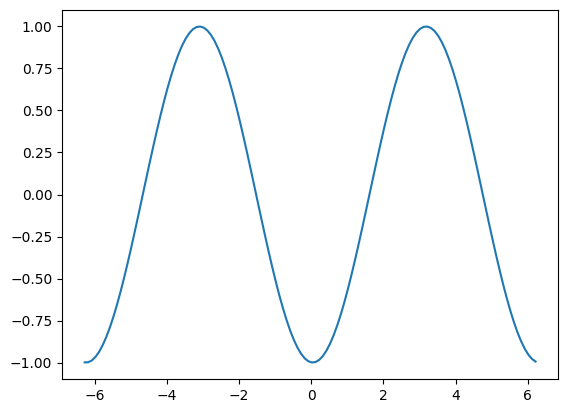

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np

plt.ion()
fig, ax = plt.subplots()
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)
line, = ax.plot(x, y)

for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x+delay)

    line.set_ydata(y)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.02)

plt.ioff()
plt.show()

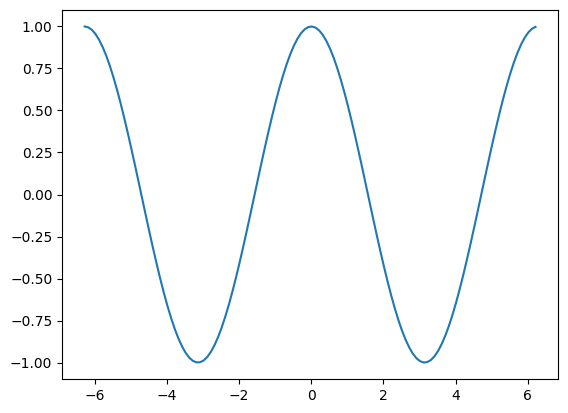

In [3]:
# используем объект FuncAnimation, который создает анимацию на основе функции
from matplotlib.animation import FuncAnimation, ArtistAnimation


def update_cos(frame, line, x):
    # frame - параметр, который меняется от кадра к кадру
    # в данном случае - это начальная фаза (угол)
    # line - ссылка на объект Line2D
    line.set_ydata(np.cos(x+frame))
    return [line]

fig, ax = plt.subplots()
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)
line, = ax.plot(x, y)

phasa = np.arange(0, 4*np.pi, 0.1)
animation = FuncAnimation(
    fig,             # фигура, где отображается анимация
    func=update_cos, # функция обновления текущего кадра
    frames=phasa,    # параметр, меняющийся от кадра к кадру
    fargs=(line, x), # дополнительные параметры для функции update_cos
    interval=30,     # задержка между кадрами, мс
    blit=True,       # использовать ли двойную буферизацию
    repeat=False,    # зацикливать ли анимацию
)

plt.show()

In [16]:
# используем объект ArtistAnimation, который создает анимацию по кадрово, требует больше памяти, но позволяет
# делать более сложную анимацию (типа 3D)
import matplotlib
matplotlib.use('Qt5Agg')
from matplotlib.animation import ArtistAnimation

fig = plt.figure(figsize=(10, 6))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.arange(-2*np.pi, 2*np.pi, 0.2)
xgrid, ygrid = np.meshgrid(x, y)

phase = np.arange(0, 2*np.pi, 0.1)
frames = []

for p in phase:
    zgrid = np.sin(xgrid + p) * np.sin(ygrid) / (xgrid * ygrid)

    line = ax_3d.plot_surface(xgrid, ygrid, zgrid, color='b')
    frames.append([line])

animation = ArtistAnimation(
    fig,             # фигура, где отображается анимация
    frames,    # кадры
    interval=30,     # задержка между кадрами, мс
    blit=True,       # использовать ли двойную буферизацию
    repeat=False,    # зацикливать ли анимацию
)

plt.show()

ImportError: Failed to import any of the following Qt binding modules: PyQt5, PySide2